In [1]:
import pandas as pd
import numpy as np


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset=pd.read_csv('/content/drive/MyDrive/Colab/JAWAD/Updated_Model_New_Data/final-ds.csv', sep=';')
dataset

,Lux1,Lux2,Lux3,Lux4,Lux5,Lux6,Lux7,Lux8,Time,GHI
0,5504,5129,4641,4440,4319,4255,4250,4262,2022-12-22 08:50:15,26.4 W/m²
1,5516,5178,4685,4485,4344,4286,4283,4296,2022-12-22 08:50:45,27.1 W/m²
2,5562,5168,4706,4499,4356,4299,4296,4310,2022-12-22 08:51:15,26.8 W/m²
3,5607,5151,4736,4498,4364,4313,4304,4319,2022-12-22 08:51:45,26.5 W/m²
4,5650,5134,4694,4470,4355,4305,4296,4310,2022-12-22 08:52:15,26.9 W/m²
...,...,...,...,...,...,...,...,...,...,...
8071,3583,2388,1343,827,618,502,467,445,2023-01-05 16:09:00,2.88 W/m²
8072,3583,2388,1343,827,625,527,485,461,2023-01-05 16:10:00,2.57 W/m²
8073,3583,2388,1343,827,629,526,483,459,2023-01-05 16:11:00,3.11 W/m²
8074,3583,2388,1343,827,592,509,457,437,2023-01-05 16:12:00,3.02 W/m²


In [4]:
dataset.columns

Index(['Lux1', 'Lux2', 'Lux3', 'Lux4', 'Lux5', 'Lux6', 'Lux7', 'Lux8', 'Time',
       'GHI'],
      dtype='object')

In [5]:
LUX=dataset.iloc[:,:-2].values
ghi=dataset.iloc[:,-1].values

In [6]:
LUX

array([[5504, 5129, 4641, ..., 4255, 4250, 4262],
       [5516, 5178, 4685, ..., 4286, 4283, 4296],
       [5562, 5168, 4706, ..., 4299, 4296, 4310],
       ...,
       [3583, 2388, 1343, ...,  526,  483,  459],
       [3583, 2388, 1343, ...,  509,  457,  437],
       [3583, 2388, 1343, ...,  485,  426,  400]])

In [25]:
ghi

array(['26.4 W/m²', '27.1 W/m²', '26.8 W/m²', ..., '3.11 W/m²',
       '3.02 W/m²', '2.81 W/m²'], dtype=object)

In [7]:
LUX.shape , ghi.shape

((8076, 8), (8076,))

In [8]:
import re
unit=' W/m²'
ghi = [float(sub.replace(unit, "").strip()) for sub in ghi]
# y

In [9]:
# making the y np array
ghi=np.array(ghi)
ghi

array([26.4 , 27.1 , 26.8 , ...,  3.11,  3.02,  2.81])

In [10]:
ghi.shape

(8076,)

In [11]:
actual_ghi=pd.DataFrame(columns=['Actual GHI'])


In [12]:
actual_ghi['Actual GHI']=ghi
actual_ghi

,Actual GHI
0,26.40
1,27.10
2,26.80
3,26.50
4,26.90
...,...
8071,2.88
8072,2.57
8073,3.11
8074,3.02


In [13]:
actual_ghi.to_csv('/content/drive/MyDrive/Colab/JAWAD/Updated_Model_New_Data/actual_ghi.csv',sep=';',index=False)

# Xgbost Regression Algorithm

In [14]:
# Training the xg_boost model on the training set
import xgboost as regressor
xgb = regressor.XGBRegressor(objective='reg:squarederror')

# Training the model on the ALL the data

In [15]:
xgb.fit(LUX,ghi)

XGBRegressor(objective='reg:squarederror')

# Saving the model to use in the function

In [16]:
# using pickle format (it best) but I can use other formats if you required 
# Other formats are ONNX, joblib
file_name='xgboost_lux_series.json'
xgb.save_model(f"/content/drive/MyDrive/Colab/JAWAD/Updated_Model_New_Data/2_paul/{file_name}")

In [17]:
# checking the saved model for regressor function
new_xgb=regressor.XGBRegressor()
new_xgb.load_model('/content/drive/MyDrive/Colab/JAWAD/Updated_Model_New_Data/2_paul/xgboost_lux_series.json')

`this will be the accuracy of our model which we will use in the regression function`

In [18]:
predictions =new_xgb.predict(LUX)

In [19]:
predictions

array([23.190758 , 23.190758 , 24.640419 , ...,  4.5377502,  4.5377502,
        4.5377502], dtype=float32)

In [20]:
# Testing the root mean squared error of the loaded model
from sklearn.metrics import mean_squared_error
root_mean_sqaure_error=np.sqrt(mean_squared_error(ghi,predictions))
root_mean_sqaure_error

7.763411911880162

In [21]:
# making a new dataframe
to_plot = pd.DataFrame(columns =['Actual Values','Predicted Values'])
to_plot['Actual Values']=actual_ghi
to_plot['Estimated Values']=predictions
to_plot = to_plot.drop('Predicted Values', axis=1)
to_plot

,Actual Values,Estimated Values
0,26.40,23.190758
1,27.10,23.190758
2,26.80,24.640419
3,26.50,24.640419
4,26.90,24.640419
...,...,...
8071,2.88,4.537750
8072,2.57,4.537750
8073,3.11,4.537750
8074,3.02,4.537750


In [ ]:
# Optional Plotly Method Imports
import plotly
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import cufflinks as cf
cf.go_offline()

to_plot.iplot()

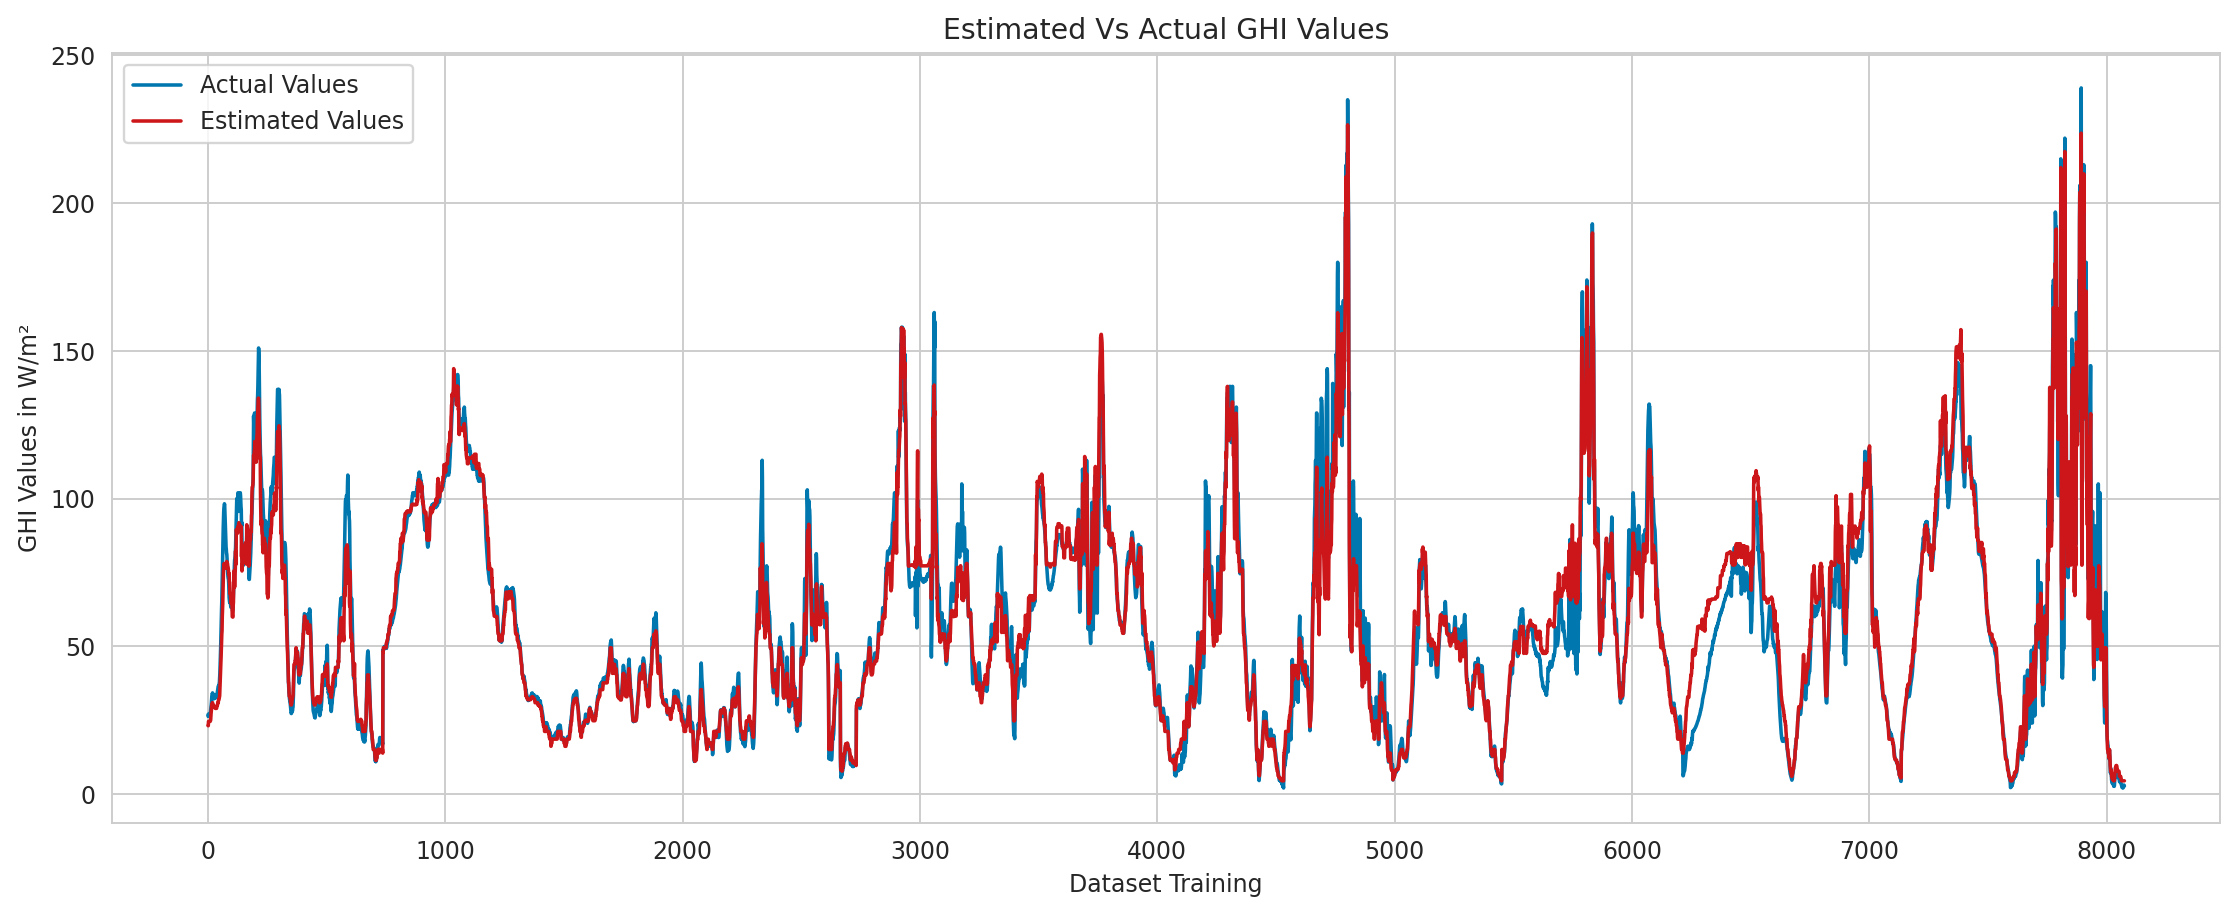

In [32]:
figure(figsize=(16, 6), dpi=170)
plt.plot(to_plot['Actual Values'],color='#0077ae', label='Actual Values')
plt.plot(to_plot['Estimated Values'],color='#cd1619', label='Estimated Values') 
plt.title('Estimated Vs Actual GHI Values')
plt.ylabel('GHI Values in W/m²')
plt.xlabel('Dataset Training')
plt.legend();

In [30]:
new_xgb.feature_importances_

array([0.02181797, 0.02762943, 0.06362588, 0.08363376, 0.01700518,
       0.15739371, 0.08858474, 0.5403093 ], dtype=float32)

In [34]:
data=pd.read_csv('/content/drive/MyDrive/Colab/JAWAD/Updated_Model_New_Data/final-ds.csv', sep=';')
data['Estimated GHI']=predictions

data

,Lux1,Lux2,Lux3,Lux4,Lux5,Lux6,Lux7,Lux8,Time,GHI,Estimated GHI
0,5504,5129,4641,4440,4319,4255,4250,4262,2022-12-22 08:50:15,26.4 W/m²,23.190758
1,5516,5178,4685,4485,4344,4286,4283,4296,2022-12-22 08:50:45,27.1 W/m²,23.190758
2,5562,5168,4706,4499,4356,4299,4296,4310,2022-12-22 08:51:15,26.8 W/m²,24.640419
3,5607,5151,4736,4498,4364,4313,4304,4319,2022-12-22 08:51:45,26.5 W/m²,24.640419
4,5650,5134,4694,4470,4355,4305,4296,4310,2022-12-22 08:52:15,26.9 W/m²,24.640419
...,...,...,...,...,...,...,...,...,...,...,...
8071,3583,2388,1343,827,618,502,467,445,2023-01-05 16:09:00,2.88 W/m²,4.537750
8072,3583,2388,1343,827,625,527,485,461,2023-01-05 16:10:00,2.57 W/m²,4.537750
8073,3583,2388,1343,827,629,526,483,459,2023-01-05 16:11:00,3.11 W/m²,4.537750
8074,3583,2388,1343,827,592,509,457,437,2023-01-05 16:12:00,3.02 W/m²,4.537750


In [35]:
%%shell
jupyter nbconvert --to html /content/modelreg.ipynb

[NbConvertApp] Converting notebook /content/modelreg.ipynb to html
[NbConvertApp] Writing 641531 bytes to /content/modelreg.html
